In [15]:
import numpy as np
import pandas as pd
import os
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [16]:
all_chunks = pd.DataFrame()
with open('data/lyrics_genre_MSD_1000chunks.pickle', 'rb') as dataFile:
    all_chunks = pickle.load(dataFile)
print('Original data', all_chunks.shape)

Original data (49658, 36)


In [17]:
df = all_chunks[['song_id','lyrics','genre']]
df.head()


,song_id,lyrics,genre
0,b'SOLQSFQ12A8C137FA1',We see life through the same lens\nThat's what...,Rock
2,b'SOSFSWB12AB018C99A',My gears they grind\nMore each day\nAnd I feel...,Rock
3,b'SOVYLKF12AF72A6369',"Made of metal, made of metal, made of metal, m...",Metal
8,b'SOPSJQH12A8C134466',All my life\nIt's changing every day\nIn every...,Pop
12,b'SOBHAQS12A8C142CA6',Who put the monkey wrench in well oiled prefec...,Hip-Hop


In [18]:
df.genre.unique()

array(['Rock', 'Metal', 'Pop', 'Hip-Hop', 'Folk', 'Not Available',
       'Electronic', 'Country', 'Jazz', 'Other', 'Indie', 'R&B'],
      dtype=object)

In [19]:
dftemp = df

In [20]:
dftemp.head()

,song_id,lyrics,genre
0,b'SOLQSFQ12A8C137FA1',We see life through the same lens\nThat's what...,Rock
2,b'SOSFSWB12AB018C99A',My gears they grind\nMore each day\nAnd I feel...,Rock
3,b'SOVYLKF12AF72A6369',"Made of metal, made of metal, made of metal, m...",Metal
8,b'SOPSJQH12A8C134466',All my life\nIt's changing every day\nIn every...,Pop
12,b'SOBHAQS12A8C142CA6',Who put the monkey wrench in well oiled prefec...,Hip-Hop


In [21]:
dff = dftemp.groupby('genre')
pd.value_counts(dftemp['genre'])

Rock             23235
Pop               6886
Metal             4861
Hip-Hop           4025
Not Available     2937
Country           2569
Electronic        1518
Jazz              1414
R&B                720
Indie              629
Other              508
Folk               356
Name: genre, dtype: int64

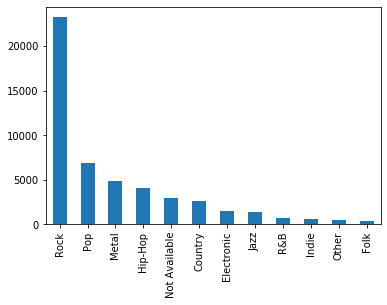

In [22]:
pd.value_counts(dftemp['genre']).plot.bar()
plt.savefig('images/genre_distribution.png')

In [23]:
df1000 = dftemp.groupby('genre').head(1000).reset_index(drop=True)

In [24]:
df1000.shape

(10213, 3)

In [25]:
df1000.head()

,song_id,lyrics,genre
0,b'SOLQSFQ12A8C137FA1',We see life through the same lens\nThat's what...,Rock
1,b'SOSFSWB12AB018C99A',My gears they grind\nMore each day\nAnd I feel...,Rock
2,b'SOVYLKF12AF72A6369',"Made of metal, made of metal, made of metal, m...",Metal
3,b'SOPSJQH12A8C134466',All my life\nIt's changing every day\nIn every...,Pop
4,b'SOBHAQS12A8C142CA6',Who put the monkey wrench in well oiled prefec...,Hip-Hop


In [30]:
indexNames = df1000[ df1000['genre'] == "Not Available" ].index
df1000.drop(indexNames , inplace=True)

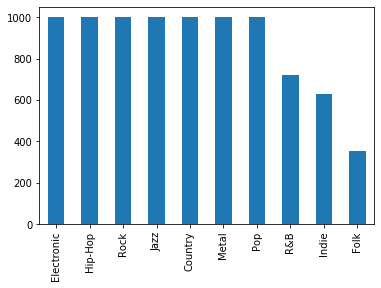

In [31]:
pd.value_counts(df1000['genre']).plot.bar()
plt.savefig('images/genre_equal_distribution.png')

In [36]:
uniqueGenres = df1000.genre.unique()
for genre in uniqueGenres:
    print(genre)
    tempdf = df1000[df1000['genre']==genre]
    allLyrics = tempdf['lyrics']
    combo=""
    for lyric in allLyrics:
        lyric = str(lyric)
        lyric = re.sub(r'\W+ \n', '', lyric)
        combo = combo+lyric+"\n\n"
        combo = combo.encode().decode('utf-8','ignore')
    filename = 'lyrics/'+genre+'.txt'
    with open(filename,'a') as f:
        f.write(combo)
        f.close()

Rock
Metal
Pop
Hip-Hop
Folk
Electronic
Country
Jazz
Indie
R&B


In [74]:
# allLyrics = df1000['lyrics']
# combo=""
# for lyric in allLyrics:
#     lyric = str(lyric)
#     lyric = re.sub(r'\W+ \n', '', lyric)
#     combo = combo+lyric+"\n\n"
#     combo = combo.encode().decode('utf-8','ignore')
# #     combo = unicode(combo, "utf-8")
# #     decode('utf-8', 'ignore')
# print(combo)
# with open('allLyrics.txt','a') as f:
#     f.write(combo)
#     f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

